In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from solvers import util


In [33]:
drones_3_7_combined= pd.read_excel('ADMM_mpc_3_to_7_agents.xlsm', sheet_name='Sheet1')

In [34]:
drones_3_7_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', 'Distributed ADMM', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [48]:
drones_3_7_combined = drones_3_7_combined.loc[drones_3_7_combined[' converged']==True]

In [49]:
drones_3_7_combined= drones_3_7_combined.replace(to_replace='None', value=np.nan).dropna()

In [50]:
drones_3_7_combined = drones_3_7_combined.dropna()

In [51]:
drones_3_7_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', 'Distributed ADMM', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [52]:
drones_3_7_combined.tail()

,i_trial,n_agents,t,converged,obj_trj,T,dt,radius,Distributed ADMM,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal
288,44,7,1.7,True,1948.677442,8,0.1,0.3,False,5.354164,1.049519,3,[0.083 0.084 0.061 0.086 0.033 0.071 0.053]
289,44,7,1.7,True,1933.826228,8,0.1,0.3,True,0.328179,0.097770,3,[0.073 0.091 0.053 0.075 0.033 0.067 0.049]
297,48,7,1.6,True,1576.813193,8,0.1,0.3,True,0.345129,0.102626,3,[0.048 0.031 0.068 0.041 0.076 0.082 0.087]
298,49,7,1.5,True,1517.804776,8,0.1,0.3,False,6.166971,1.290226,3,[0.097 0.093 0.069 0.08 0.021 0.024 0.083]
299,49,7,1.5,True,1503.341503,8,0.1,0.3,True,0.323422,0.071051,3,[0.097 0.093 0.056 0.066 0.026 0.025 0.083]


In [53]:
# drones_3_8_combined['normalized_t_solve'] = drones_3_8_combined['t_solve_avg']/drones_3_8_combined['obj_trj']
# drones_3_8_combined['normalized_t_solve'] = np.log(drones_3_8_combined['t_solve_avg'])

/tmp/ipykernel_1550/2845598306.py:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('m')
/tmp/ipykernel_1550/2845598306.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('g')


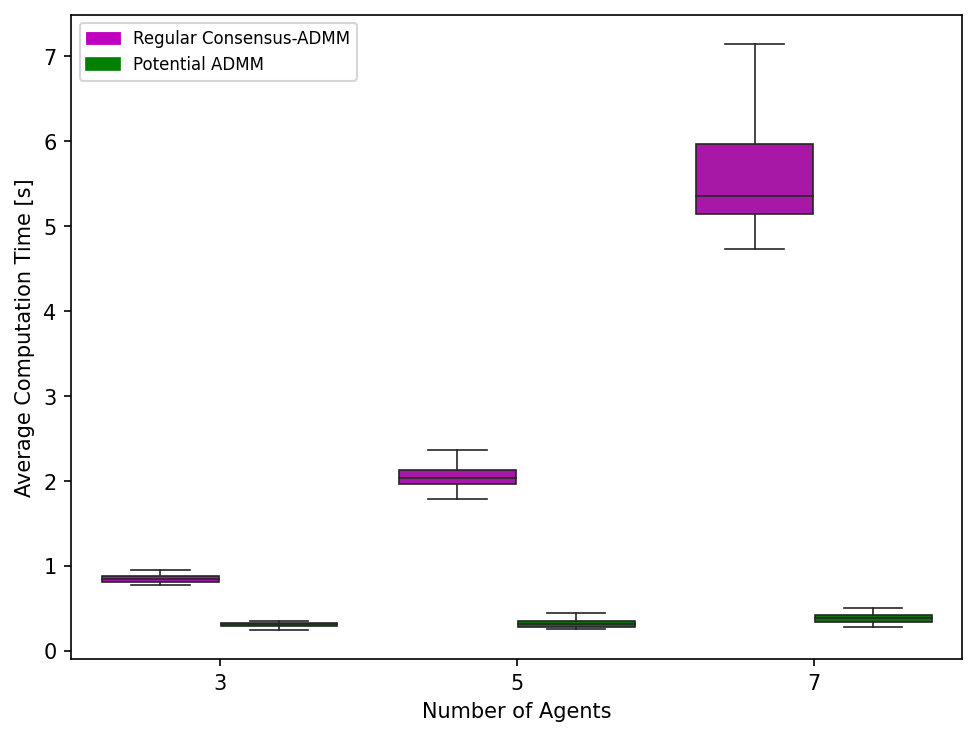

In [55]:
plt.figure(dpi=150)

sns.boxplot(data=drones_3_7_combined, x=" n_agents", y="t_solve_avg", hue='Distributed ADMM', palette=["m", "g"], showfliers=False,linewidth=0.8)
legend =  plt.legend(['Regular Consensus-ADMM','Potential ADMM'],fontsize=8)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('m')
leg.legendHandles[1].set_color('g')
plt.ylabel('Average Computation Time [s]');
plt.xlabel('Number of Agents');
plt.savefig('results/ADMM_avg_computation_time.png')

/tmp/ipykernel_1550/3893548614.py:6: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('m')
/tmp/ipykernel_1550/3893548614.py:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('g')


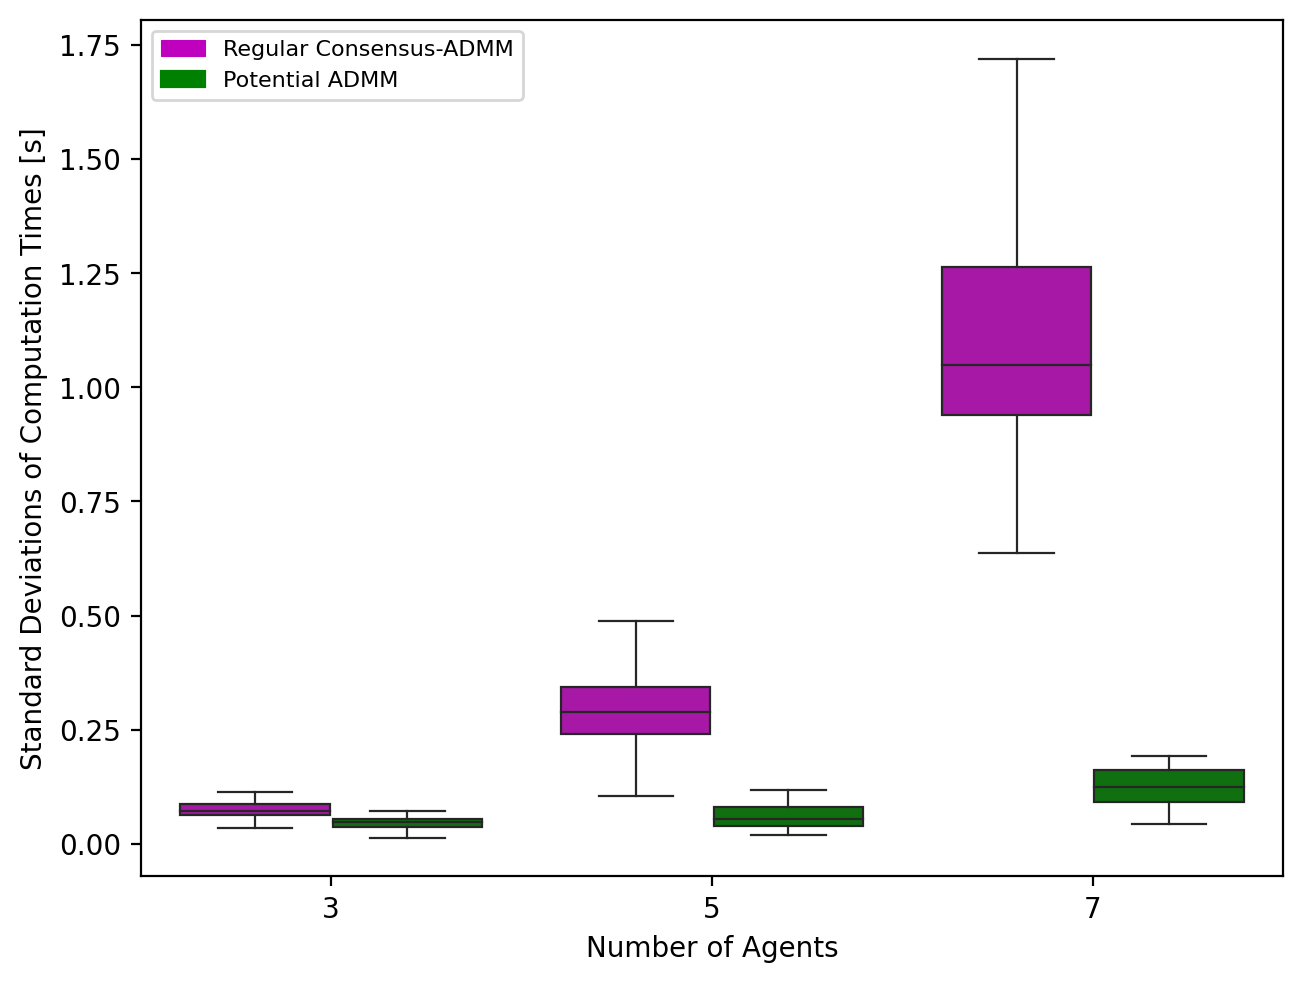

In [56]:
plt.figure(dpi=200)
sns.boxplot(data=drones_3_7_combined, x=" n_agents", y=" t_solve_std", hue='Distributed ADMM', palette=["m", "g"], showfliers=False,linewidth=0.8)
legend =  plt.legend(['Regular Consensus-ADMM','Potential ADMM'],fontsize=8)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('m')
leg.legendHandles[1].set_color('g')
plt.ylabel('Standard Deviations of Computation Times [s]');
plt.xlabel('Number of Agents');
plt.savefig('results/ADMM_avg_std_time.png')

In [57]:
df = drones_3_7_combined

In [58]:
df_try = df.replace(to_replace='None', value=np.nan).dropna()

In [59]:
df_try = df.replace(to_replace=np.inf, value=np.nan).dropna()

In [60]:
optimality_df = df_try.groupby(['Distributed ADMM',' n_agents']).agg({' obj_trj': ['mean', 'std']})

In [61]:
optimality_df

obj_trj            
                                   mean         std
Distributed ADMM  n_agents                         
False            3           721.013708  123.222990
                 5          1107.744184  147.878226
                 7          1640.138565  186.070768
True             3           716.059591  106.632474
                 5          1111.510518  158.690200
                 7          1634.058003  204.215359

In [62]:
optimality_df.columns=['mean_value','std_value']

In [63]:
optimality_df = optimality_df.reset_index()

In [64]:
optimality_df

,Distributed ADMM,n_agents,mean_value,std_value
0,False,3,721.013708,123.222990
1,False,5,1107.744184,147.878226
2,False,7,1640.138565,186.070768
3,True,3,716.059591,106.632474
4,True,5,1111.510518,158.690200
5,True,7,1634.058003,204.215359


In [65]:
centralized_results = optimality_df.loc[optimality_df['Distributed ADMM']==True]

In [91]:
decentralized_results_admm = optimality_df.loc[optimality_df['Distributed ADMM']==False]

In [92]:
centralized_results

,Distributed ADMM,n_agents,mean_value,std_value
3,True,3,716.059591,106.632474
4,True,5,1111.510518,158.690200
5,True,7,1634.058003,204.215359


In [94]:
decentralized_results_admm

,Distributed ADMM,n_agents,mean_value,std_value
0,False,3,721.013708,123.222990
1,False,5,1107.744184,147.878226
2,False,7,1640.138565,186.070768


In [69]:
relative_gap = np.abs(decentralized_results['mean_value'].values - centralized_results['mean_value'].values)/centralized_results['mean_value'].values
relative_gap

array([0.007, 0.003, 0.004])

In [70]:
success_count=df.groupby(['Distributed ADMM',' n_agents'])[' converged'].value_counts()

In [71]:
success_count

Distributed ADMM   n_agents   converged
False             3          True          38
                  5          True          34
                  7          True          19
True              3          True          42
                  5          True          43
                  7          True          28
Name: count, dtype: int64

In [160]:
success_count_df = pd.DataFrame(success_count)

In [161]:
success_count_df=success_count_df.rename(columns={'converged':'count'})

In [165]:
success_count_df = success_count_df.reset_index()

In [169]:
success_count_df

,Distributed ADMM,n_agents,converged,count
0,False,3,True,38
1,False,3,False,12
2,False,5,True,34
3,False,5,False,16
4,False,7,False,31
5,False,7,True,19
6,True,3,True,42
7,True,3,False,8
8,True,5,True,43
9,True,5,False,7


In [170]:
centralized = success_count_df.loc[success_count_df['Distributed ADMM']==False]

In [171]:
distributed = success_count_df.loc[success_count_df['Distributed ADMM']==True]

In [181]:
centralized.loc[centralized[' converged']==True]

,Distributed ADMM,n_agents,converged,count
0,False,3,True,38
2,False,5,True,34
5,False,7,True,19


In [184]:
success_centralized = (38+34+19)/(50*3)

In [185]:
success_centralized

0.6066666666666667

In [186]:
distributed.loc[distributed[' converged']==True]

,Distributed ADMM,n_agents,converged,count
6,True,3,True,42
8,True,5,True,43
10,True,7,True,28


In [187]:
success_decentralized = (42+43+28)/(50*3)

In [188]:
success_decentralized

0.7533333333333333

### Comparison w/ DP-ilQR:

In [73]:
dpilqr_3_to_8_agents = pd.read_excel('dpilqr_3_8_agents.xlsm', sheet_name='Sheet1')

In [74]:
dpilqr_3_to_8_agents.head()

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."


In [75]:
dpilqr_3_to_8_agents = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['converged']==True]

In [76]:
distributed_results = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['centralized']==False]

In [77]:
distributed_results

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."
...,...,...,...,...,...,...,...,...,...
175,8,25,False,2592.796278,8,0.1,True,0.132905,"[0.04434154194409573, 0.03013982249851408, 0.0..."
176,8,26,False,1978.219293,8,0.1,True,0.052027,"[0.038369301166101946, 0.0759788920378947, 0.0..."
177,8,27,False,2455.109000,8,0.1,True,0.102513,"[0.008364240592466331, 0.06278290647887015, 0...."
178,8,28,False,1915.307486,8,0.1,True,0.084032,"[0.003785950916613656, 0.048239522293685624, 0..."


In [83]:
distributed_results = distributed_results.loc[distributed_results['n_agents'].isin([3, 5, 7])]

In [86]:
distributed_results

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."
...,...,...,...,...,...,...,...,...,...
144,7,24,False,1606.906000,8,0.1,True,0.042736,"[0.020971110563766784, 0.028851773910154484, 0..."
146,7,26,False,1404.086473,8,0.1,True,0.037149,"[0.07132892289844533, 0.03170160072255465, 0.0..."
147,7,27,False,1581.788665,8,0.1,True,0.079739,"[0.05054562520113261, 0.09820321607508685, 0.0..."
148,7,28,False,2010.653551,8,0.1,True,0.168256,"[0.03533992837282258, 0.08173398107309891, 0.0..."


In [105]:
dpilqr_comparison_df = distributed_results.groupby(['n_agents']).agg({'J': ['mean', 'std']})

In [111]:
dpilqr_comparison_df.columns=['mean','std']

In [114]:
dpilqr_comparison_df = dpilqr_comparison_df.reset_index()

In [115]:
dpilqr_comparison_df

,n_agents,mean,std
0,3,727.734362,232.753006
1,5,1267.944795,235.211356
2,7,3620.403943,5138.362924


In [95]:
decentralized_results_admm

,Distributed ADMM,n_agents,mean_value,std_value
0,False,3,721.013708,123.222990
1,False,5,1107.744184,147.878226
2,False,7,1640.138565,186.070768


In [121]:
decentralized_results_admm.drop(columns=['Distributed ADMM'])

,n_agents,mean_value,std_value
0,3,721.013708,123.222990
1,5,1107.744184,147.878226
2,7,1640.138565,186.070768


In [122]:
(721.013708-727.734362)/727.734362

-0.0092350373308332

In [123]:
(1107.744184-1267.944795)/1267.944795

-0.1263466766311385

In [124]:
(1640.13856 - 3620.403943)/3620.403943

-0.5469736013377223